In [1]:
#loading the libraries
import pandas as pd
import numpy as np
df = pd.read_csv('../data/reviews_data_dump/reviews_badminton/data.csv')


In [2]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [4]:
df.shape

(8518, 8)

In [5]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
df['Review text'].fillna('', inplace=True)


In [7]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['Review text']))


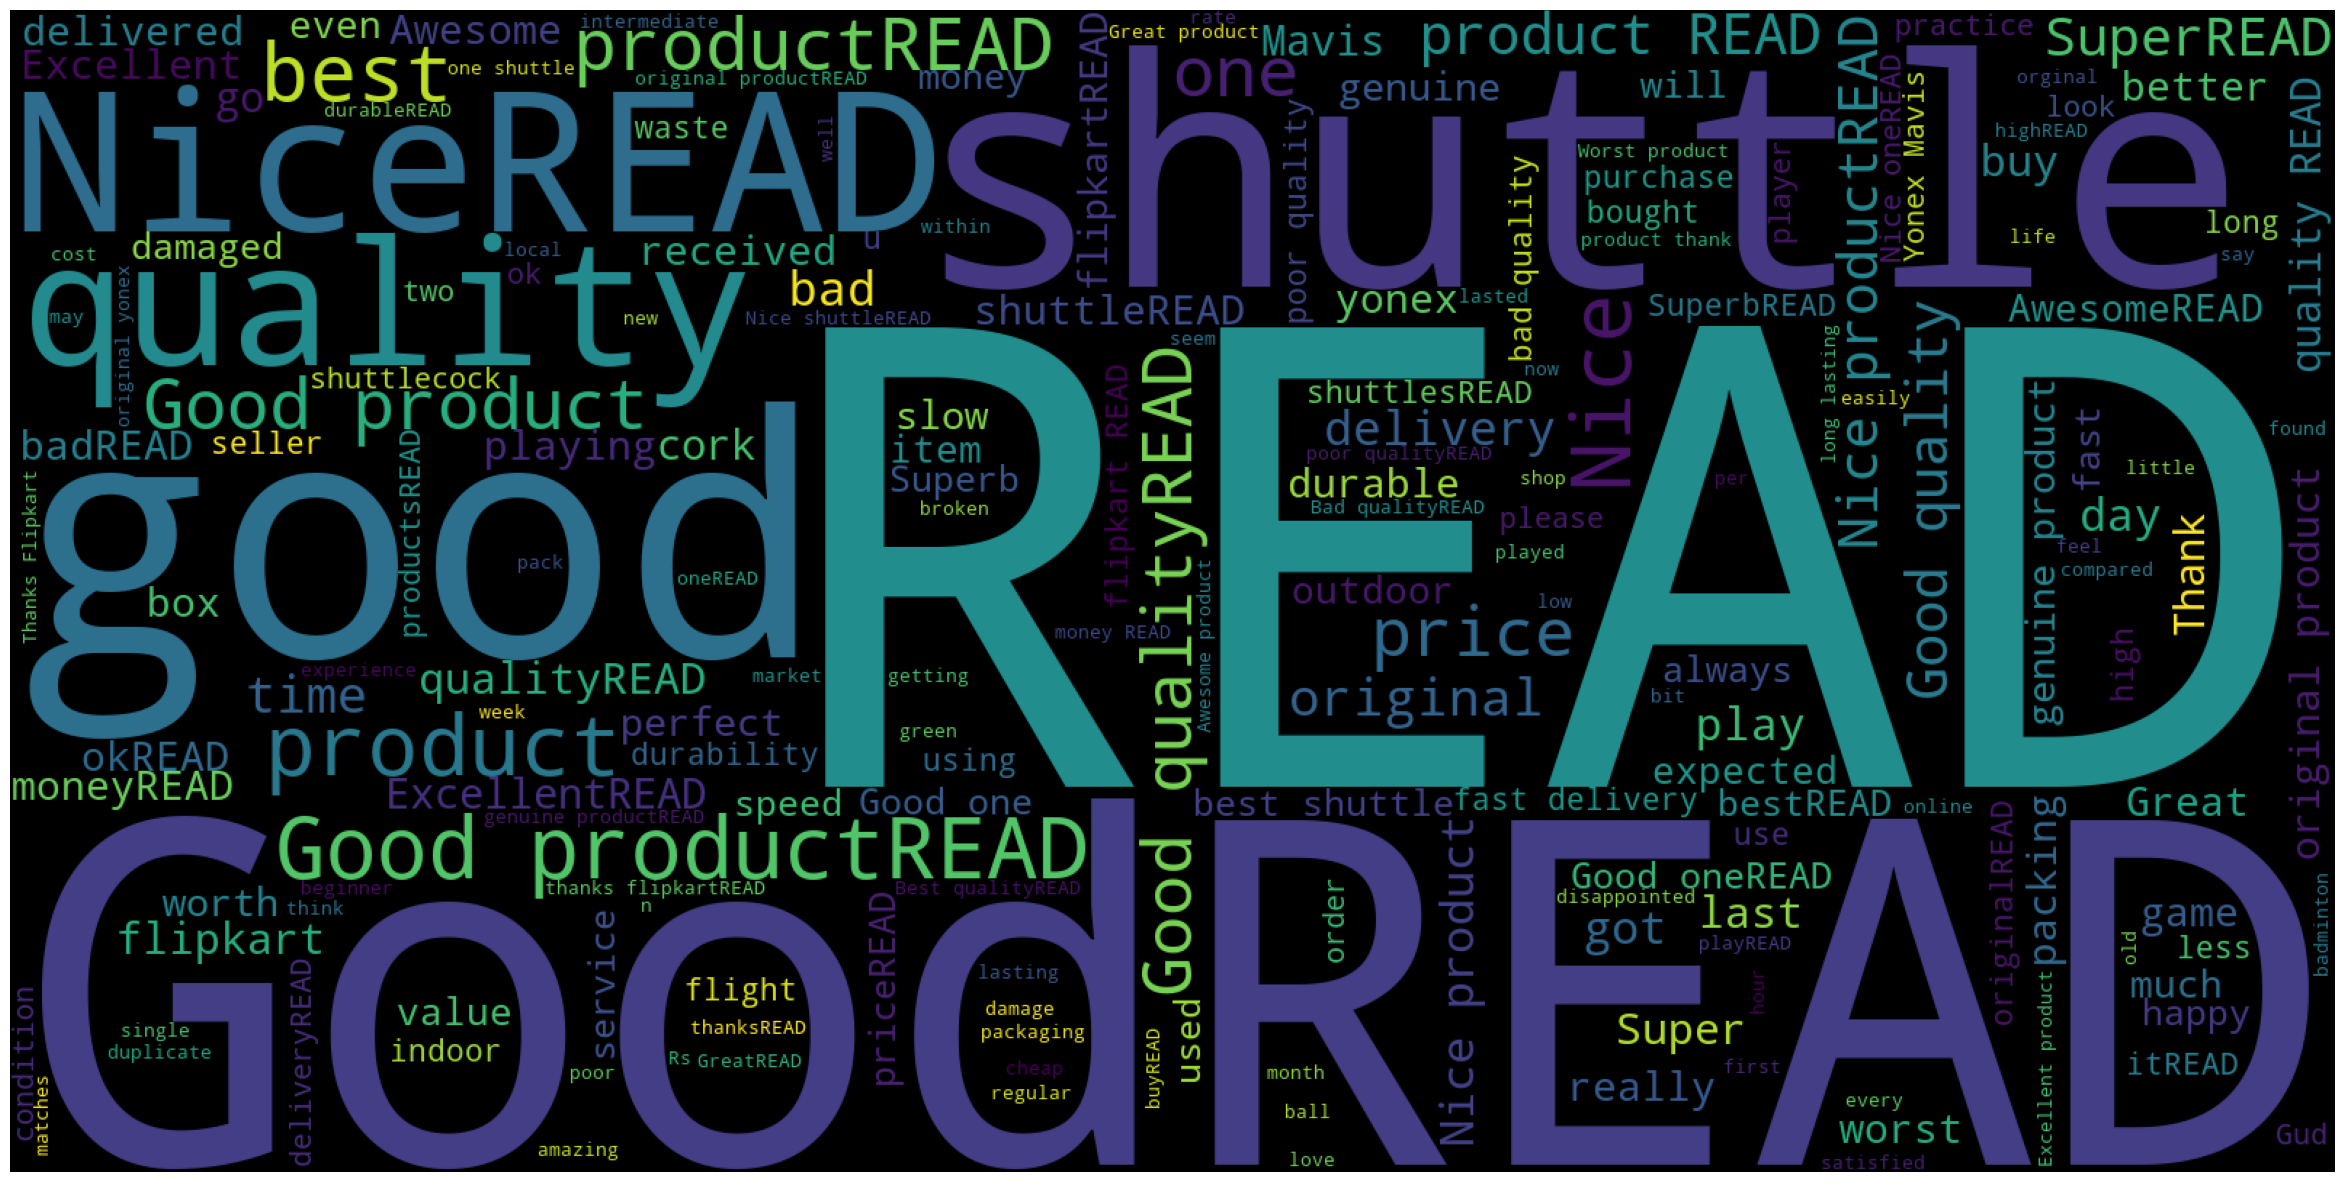

In [8]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [9]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()


# Function to analyze the sentiment of each review text and return binary classification
def analyze_sentiment_binary(review_text):
   
    # Tokenize text into sentences
    sentences = nltk.sent_tokenize(review_text)
    
    # Check if there are no sentences
    if not sentences:
        return 0  # Neutral sentiment
    
    # Initialize sentiment scores
    compound_score = 0
    
    # Get sentiment score for each sentence and aggregate
    for sentence in sentences:
        ss = sid.polarity_scores(sentence)
        compound_score += ss['compound']
    
    # Normalize compound score
    normalized_score = compound_score / len(sentences)
    
    # Classify sentiment as binary
    if normalized_score >= 0:
        return 1  # Positive sentiment
    else:
        return 0  # Negative sentiment

# Apply sentiment analysis to each review text and add 'Sentiment' column
df['Sentiment'] = df['Review text'].apply(analyze_sentiment_binary)

# Display the first few rows with sentiment analysis results
print(df[['Review text', 'Sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                         Review text  Sentiment
0  Nice product, good quality, but price is now r...          1
1  They didn't supplied Yonex Mavis 350. Outside ...          0
2  Worst product. Damaged shuttlecocks packed in ...          0
3  Quite O. K. , but nowadays  the quality of the...          1
4  Over pricedJust â?¹620 ..from retailer.I didn'...          1


In [11]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1,0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,1
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1,1


## Identify input and Output

In [12]:
# Selecting input and output columns
X = df['Review text']
y = df[['Sentiment']]
print(X.shape,y.shape)

(8518,) (8518, 1)


##  Split the Data into Train and Test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train = X_train.to_frame().reset_index(drop=True)


In [15]:
print(X_train.head())

                                         Review text
0                             nice. shuttleREAD MORE
1  Product are good only, but we received the sto...
2  Excellent service, got in one day even at remo...
3                    Good but high price...READ MORE
4  there are 2 damaged shuttles out of 6..not sat...


In [16]:
X_train.shape


(6814, 1)

## Text Preprocessing

In [17]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define the preprocess function
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # Change sentence to lowercase
    sentence = sentence.lower()

    # Tokenize into words
    tokens = sentence.split()
    
    # Remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])


In [18]:
from tqdm import tqdm, tqdm_notebook


In [19]:
tqdm.pandas()


## data preprocessing on X_train

In [20]:
temp_df = X_train['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))


100%|█████████████████████████████████████████████████████████████████████████████| 6814/6814 [00:26<00:00, 253.34it/s]


In [21]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()


,clean_text_lemma,text_length_lemma
0,nice shuttleread,2
1,product good received stock month befor manufa...,8
2,excellent service got one day even remote loca...,10
3,good high price read,4
4,damaged shuttle satisfiedread,3


In [22]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()


,Review text,clean_text_lemma,text_length_lemma
0,nice. shuttleREAD MORE,nice shuttleread,2
1,"Product are good only, but we received the sto...",product good received stock month befor manufa...,8
2,"Excellent service, got in one day even at remo...",excellent service got one day even remote loca...,10
3,Good but high price...READ MORE,good high price read,4
4,there are 2 damaged shuttles out of 6..not sat...,damaged shuttle satisfiedread,3


## Converting Text to Numerical vectors - BOW Representation


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])


In [24]:
X_train_bow.shape


(6814, 2625)

In [25]:
y_train.shape

(6814, 1)

In [26]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)


Total unique words: 2625
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (6814, 2625)


In [27]:
print(X_train_bow.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")


<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes


In [29]:
from sys import getsizeof

print(type(X_train_bow.toarray()))
print(getsizeof(X_train_bow.toarray()), "Bytes")


<class 'numpy.ndarray'>
143094128 Bytes


## Preprocessing the Test Data(x_test)


In [30]:
X_test = X_test.to_frame().reset_index(drop=True)


In [31]:
X_test.head()


,Review text
0,Fast deliveryOriginal productReasonable priceR...
1,working well in out door gameREAD MORE
2,Its value for money and most importantly it's ...
3,HorribleREAD MORE
4,GoogREAD MORE


In [32]:
temp_df = X_test['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()


100%|█████████████████████████████████████████████████████████████████████████████| 1704/1704 [00:06<00:00, 274.59it/s]


,0,1
0,fast deliveryoriginal productreasonable priceread,4
1,working well door gameread,4
2,value money importantly originalread,4
3,horribleread,1
4,googread,1


In [33]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()


,clean_text_lemma,text_length_lemma
0,fast deliveryoriginal productreasonable priceread,4
1,working well door gameread,4
2,value money importantly originalread,4
3,horribleread,1
4,googread,1


In [34]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()


,Review text,clean_text_lemma,text_length_lemma
0,Fast deliveryOriginal productReasonable priceR...,fast deliveryoriginal productreasonable priceread,4
1,working well in out door gameREAD MORE,working well door gameread,4
2,Its value for money and most importantly it's ...,value money importantly originalread,4
3,HorribleREAD MORE,horribleread,1
4,GoogREAD MORE,googread,1


In [35]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])
X_test_bow

<1704x2625 sparse matrix of type '<class 'numpy.int64'>'
	with 5490 stored elements in Compressed Sparse Row format>

## LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)


C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [37]:
y_test_pred = classifier.predict(X_test_bow)


In [38]:
print(len(y_test_pred))

1704


In [39]:
y_test

,Sentiment
7497,1
5257,1
2571,1
1084,1
856,1
...,...
7036,1
7199,1
4581,1
4925,1


In [40]:
from sklearn.metrics import  classification_report
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_test_pred)
print(f1)
print(classification_report(y_test, y_test_pred))


0.9770512417478779
              precision    recall  f1-score   support

           0       0.79      0.59      0.68       130
           1       0.97      0.99      0.98      1574

    accuracy                           0.96      1704
   macro avg       0.88      0.79      0.83      1704
weighted avg       0.95      0.96      0.95      1704



## Decision Tree


In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)


DecisionTreeClassifier()

In [42]:
y_test_pred = classifier.predict(X_test_bow)


In [43]:
from sklearn.metrics import  classification_report
from sklearn.metrics import f1_score


f1 = f1_score(y_test, y_test_pred)
print(f1)
print(classification_report(y_test, y_test_pred))


0.9628918746001279
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       130
           1       0.97      0.96      0.96      1574

    accuracy                           0.93      1704
   macro avg       0.76      0.80      0.78      1704
weighted avg       0.94      0.93      0.93      1704



## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)
     


C:\Users\shiva\AppData\Local\Temp\ipykernel_12268\2531081072.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_bow, y_train)


RandomForestClassifier()

In [45]:
y_test_pred = classifier.predict(X_test_bow)


In [46]:

from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_test, y_test_pred)
print(f1)

print(classification_report(y_test, y_test_pred))


0.9647954329210275
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       130
           1       0.96      0.97      0.96      1574

    accuracy                           0.93      1704
   macro avg       0.77      0.76      0.76      1704
weighted avg       0.93      0.93      0.93      1704



## SVM

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_bow, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_bow)

# Assuming 'negative' is the positive class label
f1_svm = f1_score(y_test, y_pred_svm)
print("SVM F1-score:", f1_svm)
print(classification_report(y_test, y_test_pred))



C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM F1-score: 0.9779179810725551
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       130
           1       0.96      0.97      0.96      1574

    accuracy                           0.93      1704
   macro avg       0.77      0.76      0.76      1704
weighted avg       0.93      0.93      0.93      1704



## Navie Baiyes

In [48]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_bow, y_train)

# Predict sentiment labels for the test data
y_pred_nb = nb_classifier.predict(X_test_bow)

# Evaluate the classifier's performance using appropriate metrics

from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_test, y_test_pred)
print(f1)

print(classification_report(y_test, y_test_pred))


0.9647954329210275
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       130
           1       0.96      0.97      0.96      1574

    accuracy                           0.93      1704
   macro avg       0.77      0.76      0.76      1704
weighted avg       0.93      0.93      0.93      1704



C:\Users\shiva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## pipeline

In [49]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

import joblib
from joblib import Memory

import os

import warnings

warnings.filterwarnings('ignore')

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'svm': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory)

}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__alpha': [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'svm': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                               )

    %time grid_search.fit(X_train['clean_text_lemma'], y_train)

    best_models[algo] = grid_search.best_estimator_

    y_pred = grid_search.predict(X_test['clean_text_lemma'])
    f1 = f1_score(y_test, y_pred)  
    print('F1-score on Test Data:', f1)


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 7.09 s
Wall time: 7.76 s
F1-score on Test Data: 0.9714467005076142
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 35 s
Wall time: 44.8 s
F1-score on Test Data: 0.9749058971141781
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 10min 35s
Wall time: 12min 6s
F1-score on Test Data: 0.9693486590038315
********** random_forest **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 13min 32s
Wall time: 15min 1s
F1-score on Test Data: 0.9768025078369906
********** svm **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: total: 9min 58s
Wall time: 11min 51s
F1-score on Test Data: 0.9773299748110832


In [50]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()


naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', RandomForestClassifier(n_estimators=50))])

svm
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('v

In [52]:
import os
import joblib

# Create the directory if it doesn't exist
if not os.path.exists('best_models'):
    os.makedirs('best_models')

# Now you can save the model
joblib.dump(model, 'best_models/naive_bayes.pkl')


['best_models/naive_bayes.pkl']

In [55]:
import joblib

# Assuming best_models is a dictionary containing model names as keys and the corresponding trained models as values

for name, model in best_models.items():
    joblib.dump(model, f'best_models/{name}.pkl')


In [61]:
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Deserialize the trained model
model = joblib.load('best_models/naive_bayes.pkl')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Take input from the user
review = input("Enter your review: ")

# Clean the input text using the preprocess_text function
preprocessed_review = preprocess_text(review)

# Perform sentiment analysis on the preprocessed text
prediction = model.predict([preprocessed_review])

# Map the prediction to sentiment labels
sentiment = "Positive" if prediction[0] == 1 else "Negative"

# Print the result
print(f"Review: {review}")
print(f"Predicted Sentiment: {sentiment}")


Enter your review: The product quality was poor and the customer service was terrible.
Review: The product quality was poor and the customer service was terrible.
Predicted Sentiment: Negative
